# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
data=pd.DataFrame(data=df[['trans_date_trans_time','amt','category','city_pop']],columns=['trans_date_trans_time','amt','category','city_pop'])

In [6]:
target=pd.DataFrame(data=df[['is_fraud']])

In [7]:
# data["Time"] = pd.to_datetime(data["trans_date_trans_time"],format="%Y/%m/%d")
data['time'] = pd.DatetimeIndex(data["trans_date_trans_time"]).hour

In [8]:
data.drop(columns=['trans_date_trans_time'])

,amt,category,city_pop,time
0,2.86,personal_care,333497,12
1,29.84,personal_care,302,12
2,41.28,health_fitness,34496,12
3,60.05,misc_pos,54767,12
4,3.19,travel,1126,12
...,...,...,...,...
555714,43.77,health_fitness,519,23
555715,111.84,kids_pets,28739,23
555716,86.88,kids_pets,3684,23
555717,7.99,travel,129,23


In [9]:
dummies=pd.get_dummies(data['category'])
X=pd.concat([dummies,data[['amt','city_pop','time']]],axis=1)
Y=target

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.7,random_state=0)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [11]:
# !pip install imblearn

In [12]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Random Over-sampling
ros = RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

# Random Under-sampling
rus = RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

# Synthetic Minority Over-sampling Technique (SMOTE)
smote = SMOTE(random_state=0)
X_smoted, y_smoted = smote.fit_resample(X_train, y_train)


# 3.) Train three logistic regression models 

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_undersampled, y_undersampled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [15]:
y_pred_undersampled=logisticRegr.predict(X_test)

In [16]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_oversampled, y_oversampled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
y_pred_oversampled=logisticRegr.predict(X_test)

In [18]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_smoted, y_smoted)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [19]:
y_pred_smoted=logisticRegr.predict(X_test)

# 4.) Test the three models

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred_undersampled)


# Calculate sensitivity (True Positive Rate or Recall)
sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])

# Calculate specificity (True Negative Rate)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_undersampled)

print("Sensitivity: {:.2f}".format(sensitivity))
print("Specificity: {:.2f}".format(specificity))
print("Accuracy: {:.2f}".format(accuracy))


print(cm)

Sensitivity: 0.74
Specificity: 0.82
Accuracy: 0.82
[[135448  30608]
 [   174    486]]


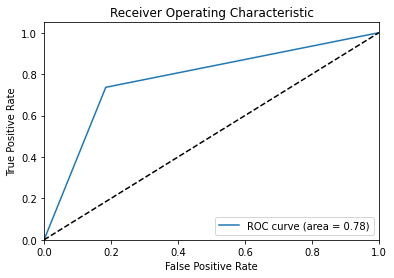

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_undersampled)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_undersampled)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [22]:
cm = confusion_matrix(y_test, y_pred_oversampled)


# Calculate sensitivity (True Positive Rate or Recall)
sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])

# Calculate specificity (True Negative Rate)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_oversampled)

print("Sensitivity: {:.2f}".format(sensitivity))
print("Specificity: {:.2f}".format(specificity))
print("Accuracy: {:.2f}".format(accuracy))


print(cm)

Sensitivity: 0.74
Specificity: 0.81
Accuracy: 0.81
[[134742  31314]
 [   171    489]]


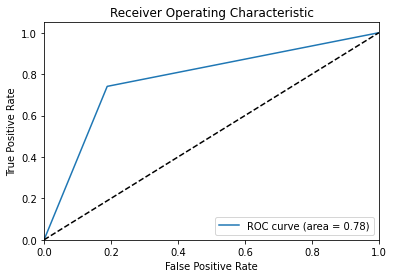

In [23]:
# Calculate the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_oversampled)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_oversampled)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [24]:
cm = confusion_matrix(y_test, y_pred_smoted)


# Calculate sensitivity (True Positive Rate or Recall)
sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])

# Calculate specificity (True Negative Rate)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_smoted)

print("Sensitivity: {:.2f}".format(sensitivity))
print("Specificity: {:.2f}".format(specificity))
print("Accuracy: {:.2f}".format(accuracy))


print(cm)

Sensitivity: 0.96
Specificity: 0.17
Accuracy: 0.17
[[ 27524 138532]
 [    27    633]]


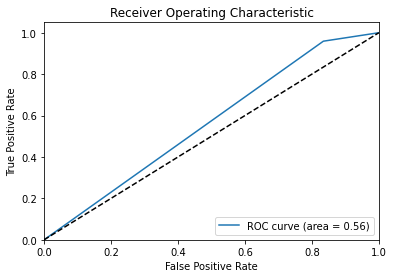

In [25]:
# Calculate the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_smoted)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_smoted)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 5.) Which performed best in Out of Sample metrics?

After comparing three models test scores like sensitivity, specificity, accuracy. We find that UnderSample model perform best in out of sample metrics.

Also, after visualizing the ROC curve, we find that UnderSample model perform best.

# 6.) Pick two features and plot the two classes before and after SMOTE.

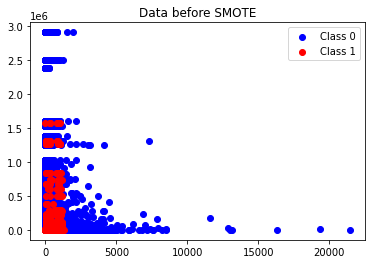

In [26]:
data7=pd.concat([X_train,y_train],axis=1)
# Plot data before SMOTE
plt.scatter(data7[data7['is_fraud'] == 0]['amt'],data7[data7['is_fraud'] ==0]['city_pop'], color='blue', label='Class 0')
plt.scatter(data7[data7['is_fraud'] == 1]['amt'], data7[data7['is_fraud'] ==1]['city_pop'], color='red', label='Class 1')
plt.legend()
plt.title('Data before SMOTE')
plt.show()


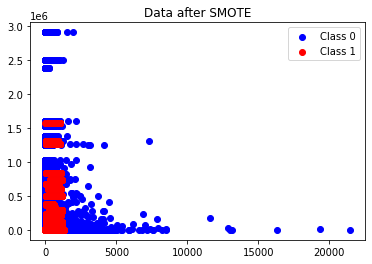

In [27]:
# Apply SMOTE
data7_smoted=pd.concat([X_smoted,y_smoted],axis=1)

# Plot data after SMOTE
plt.scatter(data7_smoted[data7_smoted['is_fraud'] == 0]['amt'],data7_smoted[data7_smoted['is_fraud'] ==0]['city_pop'], color='blue', label='Class 0')
plt.scatter(data7_smoted[data7_smoted['is_fraud'] == 1]['amt'], data7_smoted[data7_smoted['is_fraud'] ==1]['city_pop'], color='red', label='Class 1')
plt.legend()
plt.title('Data after SMOTE')
plt.show()
